# Task 3

Aritra Mukhopadhyay

Roll: 2011030

## Asbstract
Galactic mean-field dynamos play a crucial role in understanding the evolution of galaxies and the generation of magnetic fields. In this study, we investigate the behavior of these dynamos by solving the alpha-omega dynamo equations numerically. Specifically, we explore the sensitivity of the solution to the initial seed field, building on our previous results that demonstrated the independent operation of each term in the equations.

We employ the Crank-Nicolson method, a robust and unconditionally stable numerical technique, to solve the coupled double differential equations. Our results show that despite varying initial seed fields, the solution converges to the same outcome over time. This convergence suggests that the alpha-omega dynamo is remarkably robust against variations in the initial conditions.

The implications of this finding are far-reaching, as it implies that the dynamo's behavior is largely independent of the initial seed field. This could simplify models and improve predictions in astrophysical contexts. Our study provides new insights into the workings of galactic mean-field dynamos, shedding light on their ability to generate magnetic fields and shape the evolution of galaxies.

## Introduction
...

## Methods

$$ \frac{\partial B_r}{\partial t} = - \frac{\partial}{\partial z} (\alpha(z) B_\phi) + \eta_T \frac{\partial^2 B_r}{\partial z^2} $$
$$ \frac{\partial B_\phi}{\partial t} = -q\Omega B_r + \eta_T \frac{\partial^2 B_\phi}{\partial z^2} $$

Here I am supposed to solve the above equations in varying $z$ and $t$, keeping $r$ constant. Thus the $\alpha(z)=\alpha_0\sin(\pi z/h)$, $q\Omega$ and $\eta_T$ are constants in time.

$$  \frac{\partial B_r}{\partial t} = -\frac{\partial}{\partial z} (\alpha(z) B_\phi) + \eta_T \frac{\partial^2 B_r}{\partial z^2} $$

$$ \frac{\partial B_\phi}{\partial t} = -q\Omega B_r + \eta_T \frac{\partial^2 B_\phi}{\partial z^2} $$

## Crank Nicolson Method:

In this case we can take:

$$\frac{\partial U}{\partial x} = \frac{U_{i, j-1} - U_{i-1, j-1}}{\Delta x}$$
$$\frac{\partial^2 U}{\partial x^2} = \frac{1}{2\Delta x^2} \left[ (U_{i-1, j-1} + U_{i+1, j-1} - 2U_{i, j-1}) + (U_{i-1, j} + U_{i+1, j} - 2U_{i, j}) \right]$$

In the double difference term, we take the average of the two time steps.

Thus putting these in the equations:

$$  \frac{U_{i,j} - U_{i,j-1}}{\Delta t} = -\alpha(z) \frac{V_{i,j-1} - V_{i-1,j-1}}{\Delta z} + \frac{\eta_T}{2\Delta z^2} \left[ (U_{i-1,j-1} + U_{i+1,j-1} - 2U_{i,j-1}) + (U_{i-1,j} + U_{i+1,j} - 2U_{i,j}) \right] $$


$$  \frac{V_{i,j} - V_{i,j-1}}{\Delta t} = -q\Omega U_{i,j} + \frac{\eta_T}{2\Delta z^2} \left[ (V_{i-1,j-1} + V_{i+1,j-1} - 2V_{i,j-1}) + (V_{i-1,j} + V_{i+1,j} - 2V_{i,j}) \right] $$

now moving all the $j$ terms to the left side and $j-1$ terms to the right side:

$$U_{i,j} (\frac{1}{\Delta t} + \frac{\eta_T}{2\Delta z^2}) - (U_{i-1,j} + U_{i+1,j}) \frac{\eta_T}{2\Delta z^2} = U_{i,j-1} (\frac{1}{\Delta t} - \frac{1}{\Delta z^2}) - \alpha(z) \frac{V_{i,j-1} - V_{i-1,j-1}}{\Delta z} + \frac{\eta_T}{2\Delta z^2} (U_{i-1,j-1} + U_{i+1,j-1})$$

-- (1)

$$V_{i,j} (\frac{1}{\Delta t} + \frac{\eta_T}{2\Delta z^2}) - (V_{i-1,j} + V_{i+1,j}) \frac{\eta_T}{2\Delta z^2} = V_{i,j-1} (\frac{1}{\Delta t} - \frac{1}{\Delta z^2}) - q\Omega U_{i,j} + \frac{\eta_T}{2\Delta z^2} (V_{i-1,j-1} + V_{i+1,j-1})$$

-- (2)



Here to find $U_{i, j}$ we need all the values of $U$ and $V$ at time step $j-1$ (which is not a problem) along with $U_{i-1, j}$ and $V_{i-1, j}$ at time step $j$ (which is a problem). We don't have these values yet. Thus we need to construct a set of linear equations to solve this problem. Similar thing is applied to $V$ too.

Now, let us say:

- $a = (\frac{1}{\Delta t} + \frac{1}{2\Delta z^2})$
- $b = \frac{1}{2\Delta z^2}$
- $c^U_i = U_{i,j-1} (\frac{1}{\Delta t} - \frac{1}{\Delta z^2}) - \alpha(z) \frac{V_{i,j-1} - V_{i-1,j-1}}{\Delta z} + \frac{\eta_T}{2\Delta z^2} (U_{i-1,j-1} + U_{i+1,j-1})$
- $c^V_i = V_{i,j-1} (\frac{1}{\Delta t} - \frac{1}{\Delta z^2}) - q\Omega U_{i,j} + \frac{\eta_T}{2\Delta z^2} (V_{i-1,j-1} + V_{i+1,j-1})$

Note that $c^U_i$ and $c^V_i$ are the whole left sides of eqn 1 and 2 (which are completely known). Thus the equations become:

$$ -b U_{i-1,j} + aU_{i,j} - bU_{i+1,j} = c^U_i $$
$$ -b V_{i-1,j} + aV_{i,j} - bV_{i+1,j} = c^V_i $$

Where $U_{i-1,j}$, $U_{i, j}$, $U_{i+1, j}$, $V_{i-1,j}$, $V_{i,j}$ and $V_{i+1,j}$ are the unknowns. Thus we can make a matrix linear equation like $Ax=B$ where we need to get $X$ as the solution. And A and B are of the form:

$$ A = \begin{bmatrix}
 a & -b &  0 &  0 & 0 \\
-b &  a & -b &  0 & 0 \\
 0 & -b &  a & -b & 0 \\
 0 &  0 & -b &  a & -b \\
 0 &  0 &  0 & -b &  a \\
\end{bmatrix} $$

$$ B = \begin{bmatrix}
c_1 \\
c_2 \\
c_3 \\
c_4 \\
c_5 \\
\end{bmatrix} $$

Thus for every time step we need to solve this matrix equation to get the values of $U$ and $V$ at that time step Note that Matrix $A$ doesn't have a time dependent component, only $B$ has. Thus we will make the matrix $A$ only once and then solve the equation for every time step by finding the $B$ matrix for that time step.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lib.diffeq import solve, Gif
gif = Gif(  # default values
    labels=["$B_r$", "$B_\phi$"],
    skip_frame = 10,
    till = None,  # end
    fps = 24,
    fix_limits = False,
    save_dir = "outputs/asgt3"
)

**Note:** These functions have been taken from the previous task.
- `solve()`: takes initial $U$ and $V$ matrices and solves the equations for all time steps.
- `make_gif()`: Create an animated GIF of magnetic field strength vs z distance over time.

Dynamo number = -9.0
a: 10100.0, b: 5000.0


100%|██████████| 101/101 [00:15<00:00,  6.66it/s]


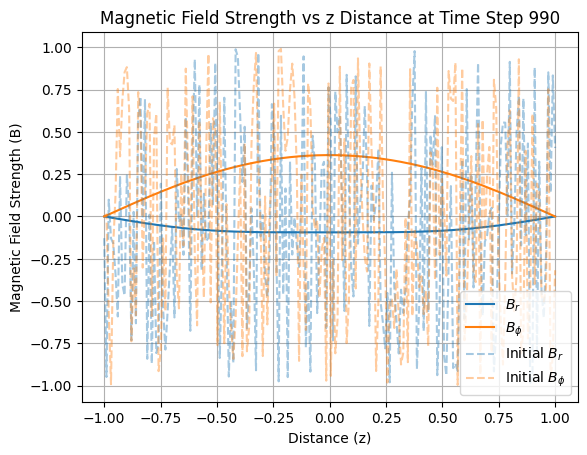

In [44]:
T = 10
dT = 0.01
NT = int(T/dT)

L = 2
dL = 0.01
NL = int(L/dL)

U = np.zeros((NT, NL))  # Initialize U matrix
V = np.zeros((NT, NL))  # Initialize V matrix

np.random.seed(2)
U[0, :] = 2e0*(np.random.rand(NL)-0.5)
V[0, :] = 2e0*(np.random.rand(NL)-0.5)

U, V = solve(U, V, dT, dL, alpha0=1, omega = 9, q = -1, eta = 1)

gif.draw(
    np.linspace(-L/2, L/2, NL),
    np.array([U, V]),
    "dynamo1.gif",
    skip_frame=10,
    # till=400
)

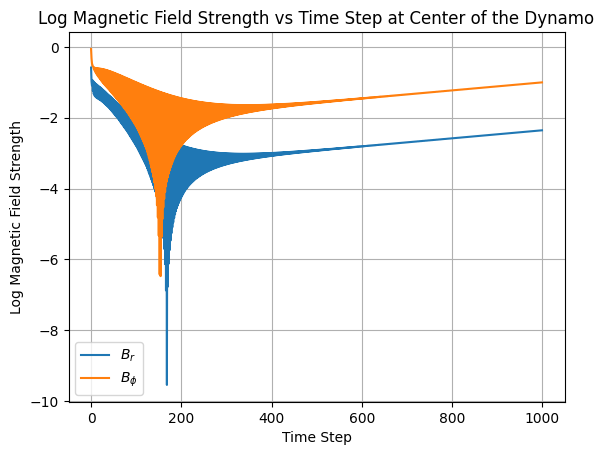

In [43]:
i = int(L/(2*dL))
plt.plot(np.log(np.abs(U[:, i])), label = "$B_r$")
plt.plot(np.log(np.abs(V[:, i])), label = "$B_\phi$")

plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Log Magnetic Field Strength")
plt.title("Log Magnetic Field Strength vs Time Step at Center of the Dynamo")
plt.legend()

plt.savefig(f"outputs/asgt3/dynamo1.png")